# Parte 2 - Experimentção

> Autor: Jonatas Travessa Souza de Barros - 1935310001

> Autor: Fabrizio Honda - 1715280006

> Autor: Dayvson Silva - 1915310007

## Importação das bibliotecas

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import random
import os

## Leitura do arquivo data0.txt com numpy

In [2]:
data0 = np.fromfile('../dados/data0.txt')
print(data0)

[-0.00149369 -0.03581784  0.         ...  1.02021556  0.86533059
  1.        ]


### Vendo o formato inicial do array

In [3]:
data0.shape

(1800,)

#### Sendo 1800 valores, significa que há 600 exemplos, visto que cada exemplo é representado por (x1, x2, yd). Logo, vamos transformar o array para representar os exemplos.

In [4]:
data0 = data0.reshape(600, 3)
print(data0)

[[-0.00149369 -0.03581784  0.        ]
 [ 0.01234945  0.10249524  0.        ]
 [ 0.13954598  0.05607083  0.        ]
 ...
 [ 0.95751872  1.0035204   1.        ]
 [ 0.97981588  1.00949493  1.        ]
 [ 1.02021556  0.86533059  1.        ]]


## Algoritmo de treinamento do Perceptron

#### A fim de diminuir a repetição de código, o algoritmo do Perceptron de Rosenblatt foi reimplementado em formato de uma classe, a qual pode ser econtrada na pasta src.

In [5]:
import sys
sys.path.append('../')
from src.Perceptron import Perceptron

## Execução das configurações

    Cada configuração é executada 100 vezes

### Configuração 1.
    Valor da taxa de aprendizado: 0.4
    Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: wi ∼ U(-100, +100).

In [7]:
learning_rate = 0.4
weights = (-100.0, 100.0)

epochs, adjustments = np.array([]), np.array([])

for i in range(1, 101, 1):
    print("\n\tIteração número ", i)

    perceptron = Perceptron(no_of_inputs=2, learning_rate=learning_rate, weights=weights)
    x_train = data0[:,[0,1]]
    y_train = data0[:,2]
    
    number_epochs, number_adjustments = perceptron.fit(x_train, y_train)
    epochs = np.append(epochs, number_epochs)
    adjustments = np.append(adjustments, number_adjustments)
    

config1_epochs_mean = np.round(np.mean(epochs), 4)
config1_epochs_sd = np.round(np.std(epochs), 4)
config1_adjusts_mean = np.round(np.mean(adjustments), 4)
config1_adjusts_sd = np.round(np.std(adjustments), 4)

print("")
print("Épocas. Média: ", config1_epochs_mean, " Desvio Padrão: ", config1_epochs_sd)
print("Ajustes. Média: ", config1_adjusts_mean, " Desvio Padrão: ", config1_adjusts_sd)


	Iteração número  1

Quantidade total de épocas: 9
Quantidade total de ajustes: 398
Vetor final de pesos: [12.4332  7.0437 18.5228]

	Iteração número  2

Quantidade total de épocas: 36
Quantidade total de ajustes: 280
Vetor final de pesos: [ 33.3469 -48.7722 109.7093]

	Iteração número  3

Quantidade total de épocas: 15
Quantidade total de ajustes: 173
Vetor final de pesos: [ 12.0759 -17.5216  39.716 ]

	Iteração número  4

Quantidade total de épocas: 6
Quantidade total de ajustes: 86
Vetor final de pesos: [24.6339  9.5748 53.9528]

	Iteração número  5

Quantidade total de épocas: 3
Quantidade total de ajustes: 85
Vetor final de pesos: [ 9.0911 -5.5811 20.2799]

	Iteração número  6

Quantidade total de épocas: 8
Quantidade total de ajustes: 593
Vetor final de pesos: [3.0879 1.6356 4.9955]

	Iteração número  7

Quantidade total de épocas: 9
Quantidade total de ajustes: 290
Vetor final de pesos: [ 4.7146 -6.7881 15.3581]

	Iteração número  8

Quantidade total de épocas: 9
Quantidade tot


Quantidade total de épocas: 8
Quantidade total de ajustes: 539
Vetor final de pesos: [ 1.2493 -1.5777  3.9061]

	Iteração número  64

Quantidade total de épocas: 18
Quantidade total de ajustes: 689
Vetor final de pesos: [ 12.1915 -17.6278  40.2773]

	Iteração número  65

Quantidade total de épocas: 11
Quantidade total de ajustes: 684
Vetor final de pesos: [ 3.8035 -4.5308 11.7365]

	Iteração número  66

Quantidade total de épocas: 23
Quantidade total de ajustes: 314
Vetor final de pesos: [ 25.9963 -38.085   86.4497]

	Iteração número  67

Quantidade total de épocas: 13
Quantidade total de ajustes: 65
Vetor final de pesos: [70.4652 10.7712 99.9099]

	Iteração número  68

Quantidade total de épocas: 8
Quantidade total de ajustes: 138
Vetor final de pesos: [  9.4279 -11.8342  31.3249]

	Iteração número  69

Quantidade total de épocas: 13
Quantidade total de ajustes: 727
Vetor final de pesos: [ 4.7462 -5.9355 14.9516]

	Iteração número  70

Quantidade total de épocas: 21
Quantidade total 

#### O seguinte vetor de pesos, obtido na última execução da configuração 1, é capaz de prover a saída correta para todos os exemplos presentes em data0.txt.

In [8]:
weights = perceptron.weights
weights

array([ 0.6442, -0.1867,  1.9606])

#### Obtenção da reta solução a partir do último vetor de pesos encontrado

In [9]:
print("Equação da reta solução: x2 = " + 
      str(np.round((weights[0]/weights[2]), 4)) + 
      " -(" + 
      str(np.round((weights[1]/weights[2]), 4)) + 
      ")*x1")

Equação da reta solução: x2 = 0.3286 -(-0.0952)*x1


#### Gráfico do conjunto de dados e a reta que separa as classes

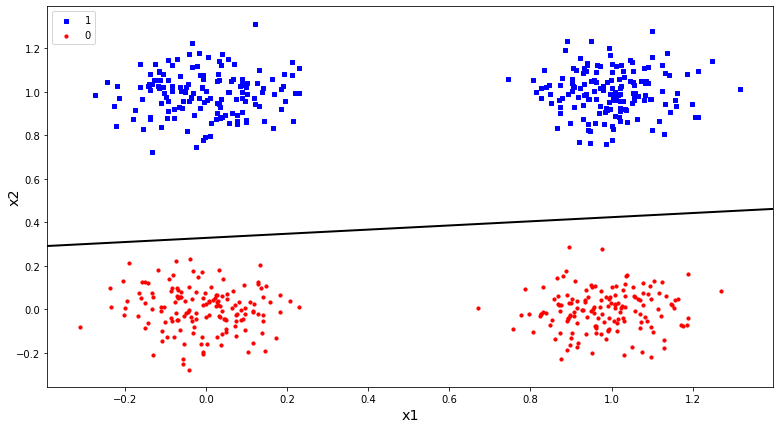

In [12]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in data0:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')

plt.legend(loc='upper left')
plt.xlabel("x1", size='x-large')
plt.ylabel("x2", labelpad=-5, size='x-large')

slope = -(weights[0]/weights[2]) / (weights[0]/weights[1])  
plt.axline((0, (weights[0]/weights[2])), slope=slope, color="black", lw=2) 

plt.show()

### Configuração 2.
    Valor da taxa de aprendizado: 0.4
    Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: wi ∼ U(-1, +1).

In [16]:
learning_rate = 0.4
weights = (-1.0, 1.0)

epochs, adjustments = np.array([]), np.array([])

for i in range(1, 101, 1):
    print("\n\tIteração número ", i)
    
    perceptron = Perceptron(no_of_inputs=2, learning_rate=learning_rate, weights=weights)
    x_train = data0[:,[0,1]]
    y_train = data0[:,2]
    
    number_epochs, number_adjustments = perceptron.fit(x_train, y_train)
    epochs = np.append(epochs, number_epochs)
    adjustments = np.append(adjustments, number_adjustments)


config2_epochs_mean = np.round(np.mean(epochs), 4)
config2_epochs_sd = np.round(np.std(epochs), 4)
config2_adjusts_mean = np.round(np.mean(adjustments), 4)
config2_adjusts_sd = np.round(np.std(adjustments), 4)

print("")
print("Épocas. Média: ", config2_epochs_mean, " Desvio Padrão: ", config2_epochs_sd)
print("Ajustes. Média: ", config2_adjusts_mean, " Desvio Padrão: ", config2_adjusts_sd)


	Iteração número  1

Quantidade total de épocas: 5
Quantidade total de ajustes: 10
Vetor final de pesos: [0.4186 0.028  1.1526]

	Iteração número  2

Quantidade total de épocas: 4
Quantidade total de ajustes: 5
Vetor final de pesos: [ 0.1746 -0.1577  0.533 ]

	Iteração número  3

Quantidade total de épocas: 5
Quantidade total de ajustes: 8
Vetor final de pesos: [ 0.7695 -0.1922  1.2893]

	Iteração número  4

Quantidade total de épocas: 3
Quantidade total de ajustes: 1
Vetor final de pesos: [ 0.4496 -0.1424  0.8036]

	Iteração número  5

Quantidade total de épocas: 4
Quantidade total de ajustes: 3
Vetor final de pesos: [0.5967 0.2482 1.0813]

	Iteração número  6

Quantidade total de épocas: 4
Quantidade total de ajustes: 7
Vetor final de pesos: [ 0.659  -0.0905  1.3806]

	Iteração número  7

Quantidade total de épocas: 5
Quantidade total de ajustes: 11
Vetor final de pesos: [0.5806 0.0967 1.2428]

	Iteração número  8

Quantidade total de épocas: 5
Quantidade total de ajustes: 9
Vetor f


Quantidade total de épocas: 4
Quantidade total de ajustes: 11
Vetor final de pesos: [ 0.4332 -0.0815  0.9359]

	Iteração número  66

Quantidade total de épocas: 4
Quantidade total de ajustes: 7
Vetor final de pesos: [0.2947 0.0932 0.6415]

	Iteração número  67

Quantidade total de épocas: 4
Quantidade total de ajustes: 9
Vetor final de pesos: [0.5326 0.2067 0.8483]

	Iteração número  68

Quantidade total de épocas: 9
Quantidade total de ajustes: 17
Vetor final de pesos: [ 1.0109 -0.1204  1.6387]

	Iteração número  69

Quantidade total de épocas: 5
Quantidade total de ajustes: 11
Vetor final de pesos: [0.7036 0.1177 1.2416]

	Iteração número  70

Quantidade total de épocas: 3
Quantidade total de ajustes: 4
Vetor final de pesos: [ 0.409  -0.0029  0.5999]

	Iteração número  71

Quantidade total de épocas: 7
Quantidade total de ajustes: 16
Vetor final de pesos: [ 0.9324 -0.1785  1.5296]

	Iteração número  72

Quantidade total de épocas: 5
Quantidade total de ajustes: 8
Vetor final de peso

#### O seguinte vetor de pesos, obtido na última execução da configuração 2, é capaz de prover a saída correta para todos os exemplos presentes em data0.txt.

In [18]:
weights = perceptron.weights
weights

array([ 0.9588, -0.1976,  1.6985])

#### Obtenção da reta solução a partir do último vetor de pesos encontrado

In [19]:
print("Equação da reta solução: x2 = " + 
      str(np.round((weights[0]/weights[2]), 4)) + 
      " -(" + 
      str(np.round((weights[1]/weights[2]), 4)) + 
      ")*x1")

Equação da reta solução: x2 = 0.5645 -(-0.1163)*x1


#### Gráfico do conjunto de dados e a reta que separa as classes

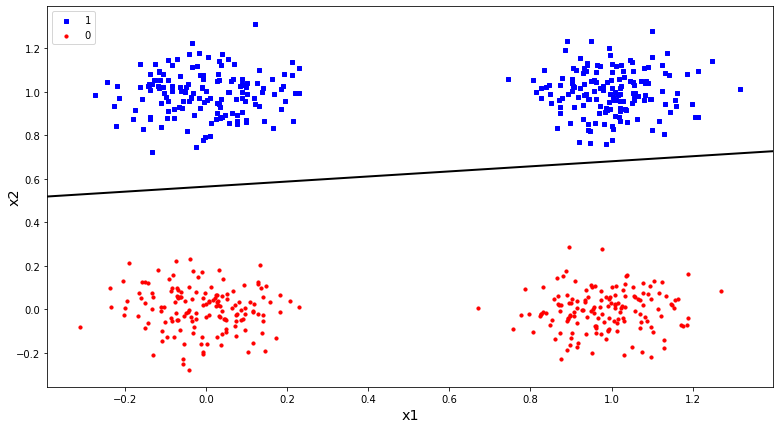

In [20]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in data0:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')

plt.legend(loc='upper left')
plt.xlabel("x1", size='x-large')
plt.ylabel("x2", labelpad=-5, size='x-large')

slope = -(weights[0]/weights[2]) / (weights[0]/weights[1])  
plt.axline((0, (weights[0]/weights[2])), slope=slope, color="black", lw=2) 

plt.show()

### Configuração 3.
    Valor da taxa de aprendizado: 0.4
    Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: wi ∼ U(-0.5, +0.5).

In [21]:
learning_rate = 0.4
weights = (-0.5, 0.5)

epochs, adjustments = np.array([]), np.array([])

for i in range(1, 101, 1):
    print("\n\tIteração número ", i)
    
    perceptron = Perceptron(no_of_inputs=2, learning_rate=learning_rate, weights=weights)
    x_train = data0[:,[0,1]]
    y_train = data0[:,2]
    
    number_epochs, number_adjustments = perceptron.fit(x_train, y_train)
    epochs = np.append(epochs, number_epochs)
    adjustments = np.append(adjustments, number_adjustments)

config3_epochs_mean = np.round(np.mean(epochs), 4)
config3_epochs_sd = np.round(np.std(epochs), 4)
config3_adjusts_mean = np.round(np.mean(adjustments), 4)
config3_adjusts_sd = np.round(np.std(adjustments), 4)

print("")
print("Épocas. Média: ", config3_epochs_mean, " Desvio Padrão: ", config3_epochs_sd)
print("Ajustes. Média: ", config3_adjusts_mean, " Desvio Padrão: ", config3_adjusts_sd)


	Iteração número  1

Quantidade total de épocas: 4
Quantidade total de ajustes: 8
Vetor final de pesos: [0.4678 0.0391 0.8614]

	Iteração número  2

Quantidade total de épocas: 5
Quantidade total de ajustes: 9
Vetor final de pesos: [ 0.362  -0.2372  1.0508]

	Iteração número  3

Quantidade total de épocas: 3
Quantidade total de ajustes: 2
Vetor final de pesos: [ 0.404  -0.0473  0.6345]

	Iteração número  4

Quantidade total de épocas: 3
Quantidade total de ajustes: 2
Vetor final de pesos: [ 0.2692 -0.1087  0.5011]

	Iteração número  5

Quantidade total de épocas: 5
Quantidade total de ajustes: 7
Vetor final de pesos: [ 0.4484 -0.0852  0.7957]

	Iteração número  6

Quantidade total de épocas: 6
Quantidade total de ajustes: 9
Vetor final de pesos: [ 0.8524 -0.0383  1.4023]

	Iteração número  7

Quantidade total de épocas: 4
Quantidade total de ajustes: 4
Vetor final de pesos: [ 0.2369 -0.0212  0.4588]

	Iteração número  8

Quantidade total de épocas: 5
Quantidade total de ajustes: 7
Vet


Quantidade total de épocas: 4
Quantidade total de ajustes: 5
Vetor final de pesos: [ 0.4943 -0.1358  1.015 ]

	Iteração número  69

Quantidade total de épocas: 6
Quantidade total de ajustes: 13
Vetor final de pesos: [ 0.7876 -0.1792  1.2933]

	Iteração número  70

Quantidade total de épocas: 8
Quantidade total de ajustes: 11
Vetor final de pesos: [ 0.8576 -0.2927  1.6925]

	Iteração número  71

Quantidade total de épocas: 4
Quantidade total de ajustes: 6
Vetor final de pesos: [ 0.3181 -0.0204  0.7188]

	Iteração número  72

Quantidade total de épocas: 4
Quantidade total de ajustes: 5
Vetor final de pesos: [0.3534 0.1133 0.5991]

	Iteração número  73

Quantidade total de épocas: 4
Quantidade total de ajustes: 8
Vetor final de pesos: [ 0.4581 -0.0653  0.8321]

	Iteração número  74

Quantidade total de épocas: 7
Quantidade total de ajustes: 13
Vetor final de pesos: [0.7689 0.0478 1.6435]

	Iteração número  75

Quantidade total de épocas: 4
Quantidade total de ajustes: 6
Vetor final de pe

#### O seguinte vetor de pesos, obtido na última execução da configuração 3, é capaz de prover a saída correta para todos os exemplos presentes em data0.txt.

In [23]:
weights = perceptron.weights
weights

array([0.7012, 0.1786, 1.2689])

#### Obtenção da reta solução a partir do último vetor de pesos encontrado

In [24]:
print("Equação da reta solução: x2 = " + 
      str(np.round((weights[0]/weights[2]), 4)) + 
      " -(" + 
      str(np.round((weights[1]/weights[2]), 4)) + 
      ")*x1")

Equação da reta solução: x2 = 0.5526 -(0.1408)*x1


#### Gráfico do conjunto de dados e a reta que separa as classes

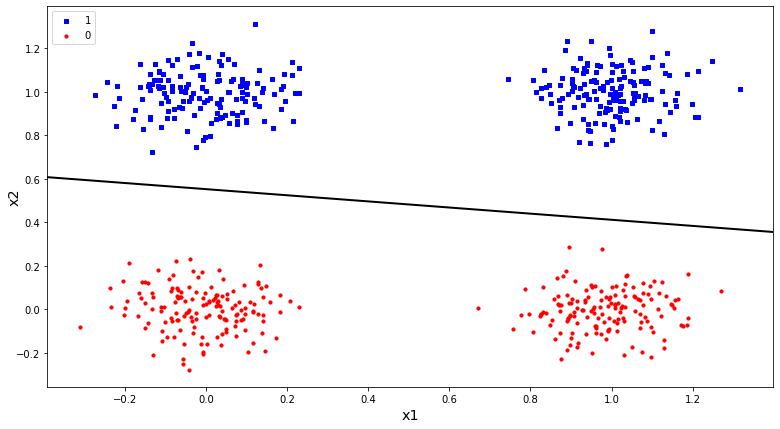

In [25]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in data0:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')

plt.legend(loc='upper left')
plt.xlabel("x1", size='x-large')
plt.ylabel("x2", labelpad=-5, size='x-large')

slope = -(weights[0]/weights[2]) / (weights[0]/weights[1])  
plt.axline((0, (weights[0]/weights[2])), slope=slope, color="black", lw=2) 

plt.show()

### Configuração 4.
    Valor da taxa de aprendizado: 0.1
    Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: wi ∼ U(-100, +100).

In [89]:
learning_rate = 0.1
weights = (-100.0, 100.0)

epochs, adjustments = np.array([]), np.array([])

for i in range(1, 101, 1):
    print("\n\tIteração número ", i)
    
    perceptron = Perceptron(no_of_inputs=2, learning_rate=learning_rate, weights=weights)
    x_train = data0[:,[0,1]]
    y_train = data0[:,2]
    
    number_epochs, number_adjustments = perceptron.fit(x_train, y_train)
    epochs = np.append(epochs, number_epochs)
    adjustments = np.append(adjustments, number_adjustments)

config4_epochs_mean = np.round(np.mean(epochs), 4)
config4_epochs_sd = np.round(np.std(epochs), 4)
config4_adjusts_mean = np.round(np.mean(adjustments), 4)
config4_adjusts_sd = np.round(np.std(adjustments), 4)

print("")
print("Épocas. Média: ", config4_epochs_mean, " Desvio Padrão: ", config4_epochs_sd)
print("Ajustes. Média: ", config4_adjusts_mean, " Desvio Padrão: ", config4_adjusts_sd)


	Iteração número  1

Quantidade total de épocas: 23
Quantidade total de ajustes: 786
Vetor final de pesos: [37.2282 19.8263 64.2369]

	Iteração número  2

Quantidade total de épocas: 112
Quantidade total de ajustes: 796
Vetor final de pesos: [ 30.2545 -44.784  100.3471]

	Iteração número  3

Quantidade total de épocas: 20
Quantidade total de ajustes: 1230
Vetor final de pesos: [ 2.9009 -4.0975  9.3831]

	Iteração número  4

Quantidade total de épocas: 82
Quantidade total de ajustes: 1198
Vetor final de pesos: [ 19.3329 -28.6855  64.2086]

	Iteração número  5

Quantidade total de épocas: 74
Quantidade total de ajustes: 779
Vetor final de pesos: [41.0711 24.5262 61.4676]

	Iteração número  6

Quantidade total de épocas: 49
Quantidade total de ajustes: 921
Vetor final de pesos: [ 20.5027 -26.0436  71.7299]

	Iteração número  7

Quantidade total de épocas: 63
Quantidade total de ajustes: 852
Vetor final de pesos: [ 14.4009 -21.1783  47.6626]

	Iteração número  8

Quantidade total de época


Quantidade total de épocas: 72
Quantidade total de ajustes: 540
Vetor final de pesos: [40.7187 24.3399 60.9198]

	Iteração número  64

Quantidade total de épocas: 6
Quantidade total de ajustes: 4
Vetor final de pesos: [ 13.6762 -12.2101  52.288 ]

	Iteração número  65

Quantidade total de épocas: 10
Quantidade total de ajustes: 1260
Vetor final de pesos: [1.9668 0.968  2.9541]

	Iteração número  66

Quantidade total de épocas: 83
Quantidade total de ajustes: 857
Vetor final de pesos: [45.6822 27.1947 68.3215]

	Iteração número  67

Quantidade total de épocas: 39
Quantidade total de ajustes: 104
Vetor final de pesos: [ 19.7853 -29.1747  65.5923]

	Iteração número  68

Quantidade total de épocas: 18
Quantidade total de ajustes: 351
Vetor final de pesos: [16.7771 -3.7285 69.7998]

	Iteração número  69

Quantidade total de épocas: 25
Quantidade total de ajustes: 138
Vetor final de pesos: [34.5311 14.6876 72.0982]

	Iteração número  70

Quantidade total de épocas: 18
Quantidade total de aj

#### O seguinte vetor de pesos, obtido na última execução da configuração 4, é capaz de prover a saída correta para todos os exemplos presentes em data0.txt.

In [90]:
weights = perceptron.weights
weights

array([ 1.0863, -1.3756,  3.3521])

#### Obtenção da reta solução a partir do último vetor de pesos encontrado

In [91]:
print("Equação da reta solução: x2 = " + 
      str(np.round((weights[0]/weights[2]), 4)) + 
      " -(" + 
      str(np.round((weights[1]/weights[2]), 4)) + 
      ")*x1")

Equação da reta solução: x2 = 0.3241 -(-0.4104)*x1


#### Gráfico do conjunto de dados e a reta que separa as classes

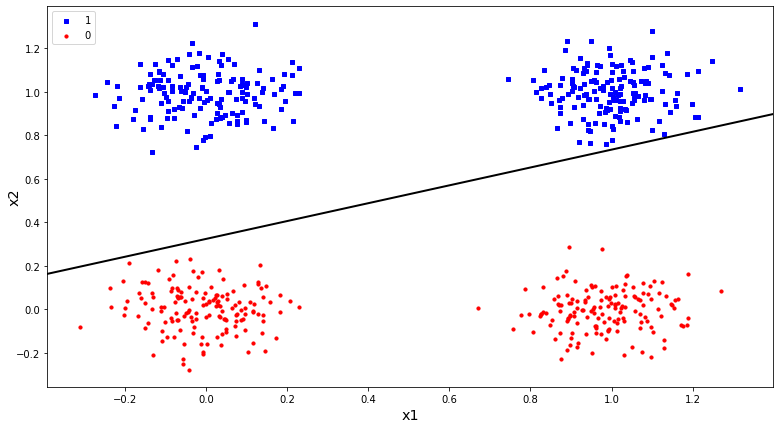

In [92]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in data0:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')

plt.legend(loc='upper left')
plt.xlabel("x1", size='x-large')
plt.ylabel("x2", labelpad=-5, size='x-large')

slope = -(weights[0]/weights[2]) / (weights[0]/weights[1])  
plt.axline((0, (weights[0]/weights[2])), slope=slope, color="black", lw=2) 

plt.show()

### Configuração 5.
    Valor da taxa de aprendizado: 0.1
    Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: wi ∼ U(-1, +1).

In [31]:
learning_rate = 0.1
weights = (-1.0, 1.0)

epochs, adjustments = np.array([]), np.array([])

for i in range(1, 101, 1):
    print("\n\tIteração número ", i)
    
    perceptron = Perceptron(no_of_inputs=2, learning_rate=learning_rate, weights=weights)
    x_train = data0[:,[0,1]]
    y_train = data0[:,2]
    
    number_epochs, number_adjustments = perceptron.fit(x_train, y_train)
    epochs = np.append(epochs, number_epochs)
    adjustments = np.append(adjustments, number_adjustments)


config5_epochs_mean = np.round(np.mean(epochs), 4)
config5_epochs_sd = np.round(np.std(epochs), 4)
config5_adjusts_mean = np.round(np.mean(adjustments), 4)
config5_adjusts_sd = np.round(np.std(adjustments), 4)

print("")
print("Épocas. Média: ", config5_epochs_mean, " Desvio Padrão: ", config5_epochs_sd)
print("Ajustes. Média: ", config5_adjusts_mean, " Desvio Padrão: ", config5_adjusts_sd)


	Iteração número  1

Quantidade total de épocas: 5
Quantidade total de ajustes: 14
Vetor final de pesos: [ 0.1345 -0.154   0.3952]

	Iteração número  2

Quantidade total de épocas: 6
Quantidade total de ajustes: 24
Vetor final de pesos: [ 0.2562 -0.0428  0.4031]

	Iteração número  3

Quantidade total de épocas: 4
Quantidade total de ajustes: 12
Vetor final de pesos: [0.2515 0.0932 0.4302]

	Iteração número  4

Quantidade total de épocas: 7
Quantidade total de ajustes: 15
Vetor final de pesos: [ 0.2673 -0.0297  0.4202]

	Iteração número  5

Quantidade total de épocas: 5
Quantidade total de ajustes: 16
Vetor final de pesos: [ 0.1788 -0.1084  0.3906]

	Iteração número  6

Quantidade total de épocas: 6
Quantidade total de ajustes: 20
Vetor final de pesos: [0.1479 0.0267 0.3167]

	Iteração número  7

Quantidade total de épocas: 5
Quantidade total de ajustes: 10
Vetor final de pesos: [0.323  0.0934 0.6622]

	Iteração número  8

Quantidade total de épocas: 6
Quantidade total de ajustes: 16
V


Quantidade total de épocas: 5
Quantidade total de ajustes: 24
Vetor final de pesos: [ 0.1926 -0.2482  0.6148]

	Iteração número  67

Quantidade total de épocas: 3
Quantidade total de ajustes: 2
Vetor final de pesos: [ 0.2154 -0.145   0.6005]

	Iteração número  68

Quantidade total de épocas: 5
Quantidade total de ajustes: 22
Vetor final de pesos: [ 0.1687 -0.0762  0.3227]

	Iteração número  69

Quantidade total de épocas: 5
Quantidade total de ajustes: 19
Vetor final de pesos: [ 0.1225 -0.0011  0.2818]

	Iteração número  70

Quantidade total de épocas: 6
Quantidade total de ajustes: 23
Vetor final de pesos: [ 0.283  -0.1748  0.7763]

	Iteração número  71

Quantidade total de épocas: 5
Quantidade total de ajustes: 14
Vetor final de pesos: [0.5822 0.234  1.0057]

	Iteração número  72

Quantidade total de épocas: 2
Quantidade total de ajustes: 0
Vetor final de pesos: [ 0.13610303 -0.07513782  0.36081187]

	Iteração número  73

Quantidade total de épocas: 6
Quantidade total de ajustes: 27

#### O seguinte vetor de pesos, obtido na última execução da configuração 5, é capaz de prover a saída correta para todos os exemplos presentes em data0.txt.

In [32]:
weights = perceptron.weights
weights

array([ 0.4066, -0.131 ,  0.9255])

#### Obtenção da reta solução a partir do último vetor de pesos encontrado

In [33]:
print("Equação da reta solução: x2 = " + 
      str(np.round((weights[0]/weights[2]), 4)) + 
      " -(" + 
      str(np.round((weights[1]/weights[2]), 4)) + 
      ")*x1")

Equação da reta solução: x2 = 0.4393 -(-0.1415)*x1


#### Gráfico do conjunto de dados e a reta que separa as classes

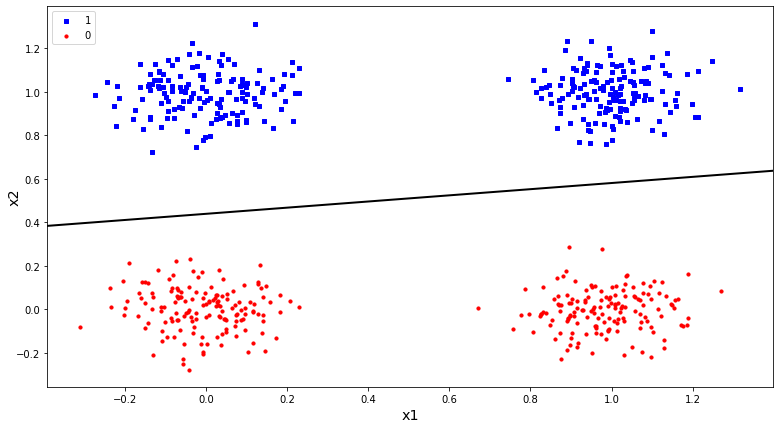

In [34]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in data0:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')

plt.legend(loc='upper left')
plt.xlabel("x1", size='x-large')
plt.ylabel("x2", labelpad=-5, size='x-large')

slope = -(weights[0]/weights[2]) / (weights[0]/weights[1])  
plt.axline((0, (weights[0]/weights[2])), slope=slope, color="black", lw=2) 

plt.show()

### Configuração 6.
    Valor da taxa de aprendizado: 0.1
    Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: wi ∼ U(-0.5, +0.5).

#### Execuções

In [40]:
learning_rate = 0.1
weights = (-0.5, 0.5)

epochs, adjustments = np.array([]), np.array([])

for i in range(1, 101, 1):
    print("\n\tIteração número ", i)
    
    perceptron = Perceptron(no_of_inputs=2, learning_rate=learning_rate, weights=weights)
    x_train = data0[:,[0,1]]
    y_train = data0[:,2]
    
    number_epochs, number_adjustments = perceptron.fit(x_train, y_train)
    epochs = np.append(epochs, number_epochs)
    adjustments = np.append(adjustments, number_adjustments)

config6_epochs_mean = np.round(np.mean(epochs), 4)
config6_epochs_sd = np.round(np.std(epochs), 4)
config6_adjusts_mean = np.round(np.mean(adjustments), 4)
config6_adjusts_sd = np.round(np.std(adjustments), 4)

print("")
print("Épocas. Média: ", config6_epochs_mean, " Desvio Padrão: ", config6_epochs_sd)
print("Ajustes. Média: ", config6_adjusts_mean, " Desvio Padrão: ", config6_adjusts_sd)


	Iteração número  1

Quantidade total de épocas: 4
Quantidade total de ajustes: 5
Vetor final de pesos: [ 0.1671 -0.0776  0.3521]

	Iteração número  2

Quantidade total de épocas: 3
Quantidade total de ajustes: 1
Vetor final de pesos: [0.2361 0.0123 0.5345]

	Iteração número  3

Quantidade total de épocas: 4
Quantidade total de ajustes: 8
Vetor final de pesos: [ 0.2258 -0.1055  0.5278]

	Iteração número  4

Quantidade total de épocas: 5
Quantidade total de ajustes: 11
Vetor final de pesos: [0.19   0.0084 0.2812]

	Iteração número  5

Quantidade total de épocas: 4
Quantidade total de ajustes: 13
Vetor final de pesos: [ 0.08   -0.0462  0.1764]

	Iteração número  6

Quantidade total de épocas: 5
Quantidade total de ajustes: 16
Vetor final de pesos: [ 0.1756 -0.0117  0.2818]

	Iteração número  7

Quantidade total de épocas: 5
Quantidade total de ajustes: 14
Vetor final de pesos: [ 0.0995 -0.0126  0.2848]

	Iteração número  8

Quantidade total de épocas: 5
Quantidade total de ajustes: 14
V


Quantidade total de épocas: 5
Quantidade total de ajustes: 11
Vetor final de pesos: [ 0.1165 -0.1453  0.3746]

	Iteração número  68

Quantidade total de épocas: 5
Quantidade total de ajustes: 15
Vetor final de pesos: [ 0.0951 -0.0255  0.2854]

	Iteração número  69

Quantidade total de épocas: 7
Quantidade total de ajustes: 16
Vetor final de pesos: [ 0.2102 -0.0761  0.3911]

	Iteração número  70

Quantidade total de épocas: 5
Quantidade total de ajustes: 14
Vetor final de pesos: [0.1508 0.042  0.2529]

	Iteração número  71

Quantidade total de épocas: 6
Quantidade total de ajustes: 21
Vetor final de pesos: [ 0.1328 -0.1099  0.4332]

	Iteração número  72

Quantidade total de épocas: 7
Quantidade total de ajustes: 16
Vetor final de pesos: [ 0.2051 -0.0803  0.4102]

	Iteração número  73

Quantidade total de épocas: 7
Quantidade total de ajustes: 17
Vetor final de pesos: [0.1932 0.0251 0.4049]

	Iteração número  74

Quantidade total de épocas: 4
Quantidade total de ajustes: 9
Vetor final d

#### O seguinte vetor de pesos, obtido na última execução da configuração 6, é capaz de prover a saída correta para todos os exemplos presentes em data0.txt.

In [41]:
weights = perceptron.weights
weights

array([ 0.1995, -0.0806,  0.4   ])

#### Obtenção da reta solução a partir do último vetor de pesos encontrado

In [42]:
print("Equação da reta solução: x2 = " + 
      str(np.round((weights[0]/weights[2]), 4)) + 
      " -(" + 
      str(np.round((weights[1]/weights[2]), 4)) + 
      ")*x1")

Equação da reta solução: x2 = 0.4988 -(-0.2015)*x1


#### Gráfico do conjunto de dados e a reta que separa as classes

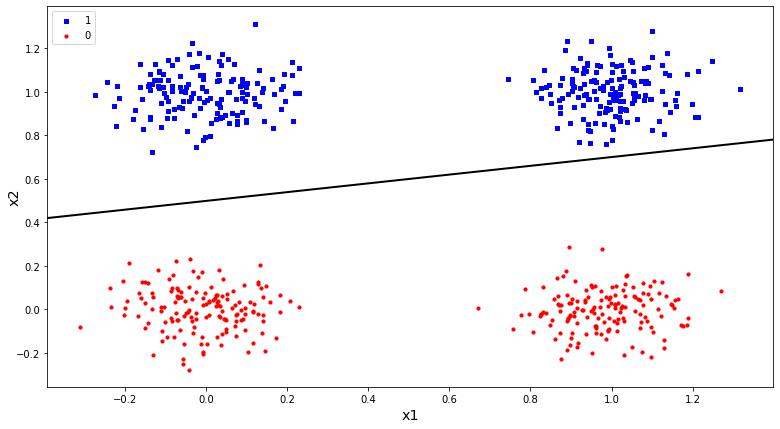

In [43]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in data0:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')

plt.legend(loc='upper left')
plt.xlabel("x1", size='x-large')
plt.ylabel("x2", labelpad=-5, size='x-large')

slope = -(weights[0]/weights[2]) / (weights[0]/weights[1])  
plt.axline((0, (weights[0]/weights[2])), slope=slope, color="black", lw=2) 

plt.show()

### Configuração 7.
    Valor da taxa de aprendizado: 0.01
    Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: wi ∼ U(-100, +100).

In [45]:
learning_rate = 0.01
weights = (-100.0, 100.0)

epochs, adjustments = np.array([]), np.array([])

for i in range(1, 101, 1):
    print("\n\tIteração número ", i)
    
    perceptron = Perceptron(no_of_inputs=2, learning_rate=learning_rate, weights=weights)
    x_train = data0[:,[0,1]]
    y_train = data0[:,2]
    
    number_epochs, number_adjustments = perceptron.fit(x_train, y_train)
    epochs = np.append(epochs, number_epochs)
    adjustments = np.append(adjustments, number_adjustments)

config7_epochs_mean = np.round(np.mean(epochs), 4)
config7_epochs_sd = np.round(np.std(epochs), 4)
config7_adjusts_mean = np.round(np.mean(adjustments), 4)
config7_adjusts_sd = np.round(np.std(adjustments), 4)

print("")
print("Épocas. Média: ", config7_epochs_mean, " Desvio Padrão: ", config7_epochs_sd)
print("Ajustes. Média: ", config7_adjusts_mean, " Desvio Padrão: ", config7_adjusts_sd)


	Iteração número  1

Quantidade total de épocas: 856
Quantidade total de ajustes: 8824
Vetor final de pesos: [ 21.4013 -31.8154  71.1168]

	Iteração número  2

Quantidade total de épocas: 66
Quantidade total de ajustes: 20098
Vetor final de pesos: [1.0169 0.5952 1.5389]

	Iteração número  3

Quantidade total de épocas: 2
Quantidade total de ajustes: 0
Vetor final de pesos: [ 30.45932668 -18.62004033  76.09527362]

	Iteração número  4

Quantidade total de épocas: 698
Quantidade total de ajustes: 25159
Vetor final de pesos: [36.801  22.0033 55.0318]

	Iteração número  5

Quantidade total de épocas: 189
Quantidade total de ajustes: 9892
Vetor final de pesos: [32.5413 18.3397 52.6423]

	Iteração número  6

Quantidade total de épocas: 57
Quantidade total de ajustes: 10897
Vetor final de pesos: [1.3013 0.7676 1.9485]

	Iteração número  7

Quantidade total de épocas: 1082
Quantidade total de ajustes: 9576
Vetor final de pesos: [62.3501 37.2947 93.2407]

	Iteração número  8

Quantidade total 


Quantidade total de épocas: 255
Quantidade total de ajustes: 7295
Vetor final de pesos: [ 10.1055 -14.9665  33.6282]

	Iteração número  62

Quantidade total de épocas: 546
Quantidade total de ajustes: 11966
Vetor final de pesos: [29.5206 17.6612 44.1481]

	Iteração número  63

Quantidade total de épocas: 832
Quantidade total de ajustes: 16255
Vetor final de pesos: [ 19.696  -29.2818  65.4358]

	Iteração número  64

Quantidade total de épocas: 845
Quantidade total de ajustes: 2847
Vetor final de pesos: [64.8091 38.7688 96.9196]

	Iteração número  65

Quantidade total de épocas: 127
Quantidade total de ajustes: 14693
Vetor final de pesos: [ 2.1003 -3.1076  6.9601]

	Iteração número  66

Quantidade total de épocas: 276
Quantidade total de ajustes: 9219
Vetor final de pesos: [14.358   8.5835 21.4765]

	Iteração número  67

Quantidade total de épocas: 537
Quantidade total de ajustes: 11962
Vetor final de pesos: [29.0895 17.398  43.5117]

	Iteração número  68

Quantidade total de épocas: 89

#### O seguinte vetor de pesos, obtido na última execução da configuração 7, é capaz de prover a saída correta para todos os exemplos presentes em data0.txt.

In [46]:
weights = perceptron.weights
weights

array([0.0388, 0.0183, 0.0746])

#### Obtenção da reta solução a partir do último vetor de pesos encontrado

In [47]:
print("Equação da reta solução: x2 = " + 
      str(np.round((weights[0]/weights[2]), 4)) + 
      " -(" + 
      str(np.round((weights[1]/weights[2]), 4)) + 
      ")*x1")

Equação da reta solução: x2 = 0.5201 -(0.2453)*x1


#### Gráfico do conjunto de dados e a reta que separa as classes

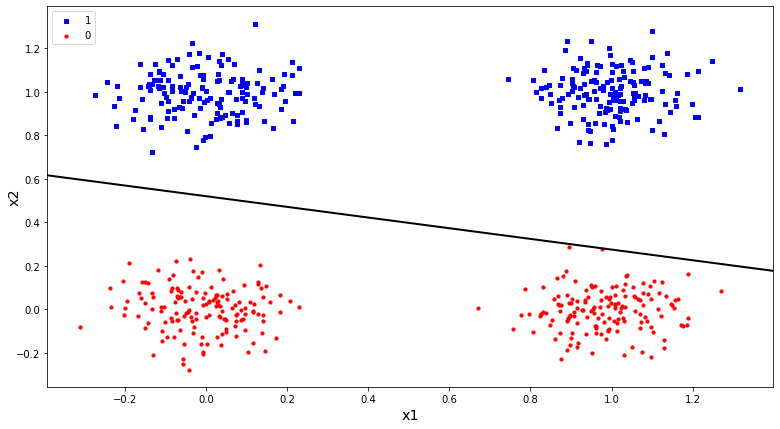

In [48]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in data0:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')

plt.legend(loc='upper left')
plt.xlabel("x1", size='x-large')
plt.ylabel("x2", labelpad=-5, size='x-large')

slope = -(weights[0]/weights[2]) / (weights[0]/weights[1])  
plt.axline((0, (weights[0]/weights[2])), slope=slope, color="black", lw=2) 

plt.show()

### Configuração 8.
    Valor da taxa de aprendizado: 0.01
    Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: wi ∼ U(-1, +1).

In [49]:
learning_rate = 0.01
weights = (-1.0, 1.0)

epochs, adjustments = np.array([]), np.array([])

for i in range(1, 101, 1):
    print("\n\tIteração número ", i)
    
    perceptron = Perceptron(no_of_inputs=2, learning_rate=learning_rate, weights=weights)
    x_train = data0[:,[0,1]]
    y_train = data0[:,2]
    
    number_epochs, number_adjustments = perceptron.fit(x_train, y_train)
    epochs = np.append(epochs, number_epochs)
    adjustments = np.append(adjustments, number_adjustments)

config8_epochs_mean = np.round(np.mean(epochs), 4)
config8_epochs_sd = np.round(np.std(epochs), 4)
config8_adjusts_mean = np.round(np.mean(adjustments), 4)
config8_adjusts_sd = np.round(np.std(adjustments), 4)

print("")
print("Épocas. Média: ", config8_epochs_mean, " Desvio Padrão: ", config8_epochs_sd)
print("Ajustes. Média: ", config8_adjusts_mean, " Desvio Padrão: ", config8_adjusts_sd)


	Iteração número  1

Quantidade total de épocas: 12
Quantidade total de ajustes: 172
Vetor final de pesos: [ 0.2024 -0.2744  0.6556]

	Iteração número  2

Quantidade total de épocas: 3
Quantidade total de ajustes: 29
Vetor final de pesos: [ 0.1947 -0.1887  0.532 ]

	Iteração número  3

Quantidade total de épocas: 7
Quantidade total de ajustes: 233
Vetor final de pesos: [0.0661 0.0269 0.0976]

	Iteração número  4

Quantidade total de épocas: 9
Quantidade total de ajustes: 182
Vetor final de pesos: [ 0.098  -0.133   0.3351]

	Iteração número  5

Quantidade total de épocas: 11
Quantidade total de ajustes: 117
Vetor final de pesos: [0.4262 0.2482 0.6488]

	Iteração número  6

Quantidade total de épocas: 6
Quantidade total de ajustes: 158
Vetor final de pesos: [0.601  0.3568 0.901 ]

	Iteração número  7

Quantidade total de épocas: 13
Quantidade total de ajustes: 38
Vetor final de pesos: [0.6752 0.3964 1.0248]

	Iteração número  8

Quantidade total de épocas: 5
Quantidade total de ajustes:


Quantidade total de épocas: 7
Quantidade total de ajustes: 173
Vetor final de pesos: [0.2063 0.1166 0.3098]

	Iteração número  66

Quantidade total de épocas: 5
Quantidade total de ajustes: 39
Vetor final de pesos: [ 0.2054 -0.2854  0.67  ]

	Iteração número  67

Quantidade total de épocas: 12
Quantidade total de ajustes: 146
Vetor final de pesos: [ 0.2268 -0.3345  0.7499]

	Iteração número  68

Quantidade total de épocas: 5
Quantidade total de ajustes: 79
Vetor final de pesos: [0.2845 0.0709 0.7096]

	Iteração número  69

Quantidade total de épocas: 13
Quantidade total de ajustes: 98
Vetor final de pesos: [ 0.2745 -0.3986  0.9015]

	Iteração número  70

Quantidade total de épocas: 7
Quantidade total de ajustes: 204
Vetor final de pesos: [0.2286 0.1322 0.349 ]

	Iteração número  71

Quantidade total de épocas: 7
Quantidade total de ajustes: 99
Vetor final de pesos: [ 0.0074 -0.0047  0.0295]

	Iteração número  72

Quantidade total de épocas: 11
Quantidade total de ajustes: 257
Vetor fi

#### O seguinte vetor de pesos, obtido na última execução da configuração 8, é capaz de prover a saída correta para todos os exemplos presentes em data0.txt.

In [50]:
weights = perceptron.weights
weights

array([ 0.0298, -0.0358,  0.1037])

#### Obtenção da reta solução a partir do último vetor de pesos encontrado

In [51]:
print("Equação da reta solução: x2 = " + 
      str(np.round((weights[0]/weights[2]), 4)) + 
      " -(" + 
      str(np.round((weights[1]/weights[2]), 4)) + 
      ")*x1")

Equação da reta solução: x2 = 0.2874 -(-0.3452)*x1


#### Gráfico do conjunto de dados e a reta que separa as classes

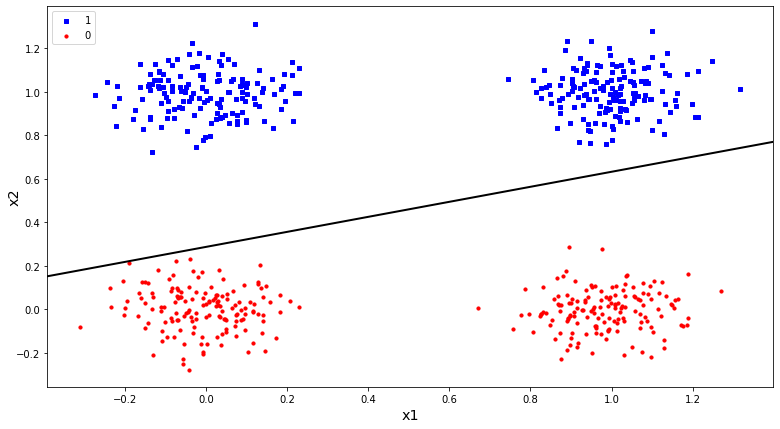

In [52]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in data0:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')

plt.legend(loc='upper left')
plt.xlabel("x1", size='x-large')
plt.ylabel("x2", labelpad=-5, size='x-large')

slope = -(weights[0]/weights[2]) / (weights[0]/weights[1])  
plt.axline((0, (weights[0]/weights[2])), slope=slope, color="black", lw=2) 

plt.show()

### Configuração 9.
    Valor da taxa de aprendizado: 0.01
    Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: wi ∼ U(-0.5, +0.5).

In [53]:
learning_rate = 0.01
weights = (-0.5, 0.5)

epochs, adjustments = np.array([]), np.array([])

for i in range(1, 101, 1):
    print("\n\tIteração número ", i)
    
    perceptron = Perceptron(no_of_inputs=2, learning_rate=learning_rate, weights=weights)
    x_train = data0[:,[0,1]]
    y_train = data0[:,2]
    
    number_epochs, number_adjustments = perceptron.fit(x_train, y_train)
    epochs = np.append(epochs, number_epochs)
    adjustments = np.append(adjustments, number_adjustments)

config9_epochs_mean = np.round(np.mean(epochs), 4)
config9_epochs_sd = np.round(np.std(epochs), 4)
config9_adjusts_mean = np.round(np.mean(adjustments), 4)
config9_adjusts_sd = np.round(np.std(adjustments), 4)

print("")
print("Épocas. Média: ", config9_epochs_mean, " Desvio Padrão: ", config9_epochs_sd)
print("Ajustes. Média: ", config9_adjusts_mean, " Desvio Padrão: ", config9_adjusts_sd)


	Iteração número  1

Quantidade total de épocas: 6
Quantidade total de ajustes: 109
Vetor final de pesos: [0.0551 0.0239 0.0845]

	Iteração número  2

Quantidade total de épocas: 7
Quantidade total de ajustes: 117
Vetor final de pesos: [ 0.079  -0.1077  0.2554]

	Iteração número  3

Quantidade total de épocas: 7
Quantidade total de ajustes: 131
Vetor final de pesos: [ 0.0649 -0.0868  0.2132]

	Iteração número  4

Quantidade total de épocas: 3
Quantidade total de ajustes: 30
Vetor final de pesos: [ 0.0688 -0.0113  0.126 ]

	Iteração número  5

Quantidade total de épocas: 6
Quantidade total de ajustes: 48
Vetor final de pesos: [0.191  0.0997 0.2892]

	Iteração número  6

Quantidade total de épocas: 7
Quantidade total de ajustes: 104
Vetor final de pesos: [ 0.0498 -0.0526  0.1557]

	Iteração número  7

Quantidade total de épocas: 8
Quantidade total de ajustes: 47
Vetor final de pesos: [ 0.103  -0.1476  0.337 ]

	Iteração número  8

Quantidade total de épocas: 4
Quantidade total de ajuste


Quantidade total de épocas: 6
Quantidade total de ajustes: 97
Vetor final de pesos: [0.0886 0.0435 0.1354]

	Iteração número  64

Quantidade total de épocas: 6
Quantidade total de ajustes: 88
Vetor final de pesos: [ 0.0346 -0.0451  0.1202]

	Iteração número  65

Quantidade total de épocas: 6
Quantidade total de ajustes: 48
Vetor final de pesos: [ 0.0187 -0.0084  0.0441]

	Iteração número  66

Quantidade total de épocas: 4
Quantidade total de ajustes: 22
Vetor final de pesos: [0.2175 0.0911 0.3328]

	Iteração número  67

Quantidade total de épocas: 6
Quantidade total de ajustes: 66
Vetor final de pesos: [ 0.0292 -0.033   0.1045]

	Iteração número  68

Quantidade total de épocas: 9
Quantidade total de ajustes: 113
Vetor final de pesos: [ 0.0902 -0.1063  0.2751]

	Iteração número  69

Quantidade total de épocas: 5
Quantidade total de ajustes: 41
Vetor final de pesos: [0.08   0.0365 0.1378]

	Iteração número  70

Quantidade total de épocas: 8
Quantidade total de ajustes: 66
Vetor final de

#### O seguinte vetor de pesos, obtido na última execução da configuração 9, é capaz de prover a saída correta para todos os exemplos presentes em data0.txt.

In [54]:
weights = perceptron.weights
weights

array([ 0.1161, -0.1511,  0.3692])

#### Obtenção da reta solução a partir do último vetor de pesos encontrado

In [55]:
print("Equação da reta solução: x2 = " + 
      str(np.round((weights[0]/weights[2]), 4)) + 
      " -(" + 
      str(np.round((weights[1]/weights[2]), 4)) + 
      ")*x1")

Equação da reta solução: x2 = 0.3145 -(-0.4093)*x1


#### Gráfico do conjunto de dados e a reta que separa as classes

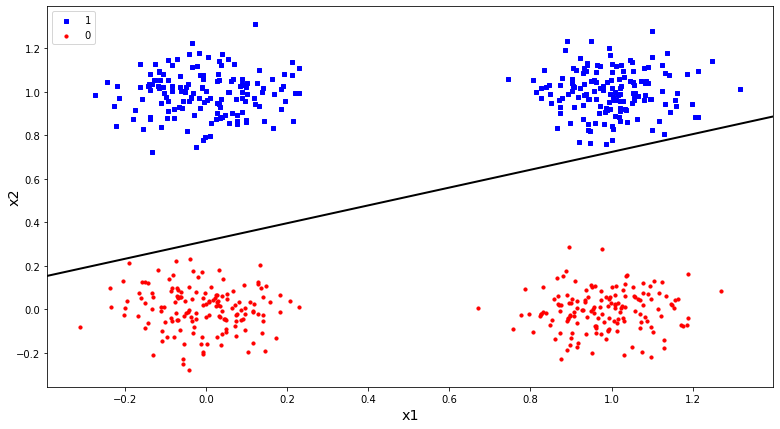

In [56]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in data0:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')

plt.legend(loc='upper left')
plt.xlabel("x1", size='x-large')
plt.ylabel("x2", labelpad=-5, size='x-large')

slope = -(weights[0]/weights[2]) / (weights[0]/weights[1])  
plt.axline((0, (weights[0]/weights[2])), slope=slope, color="black", lw=2) 

plt.show()

In [52]:
#TODO Visualização dos resultados e discussão